In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('D:/dip(AIML(cse))/kaggle/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='sex,survived'>

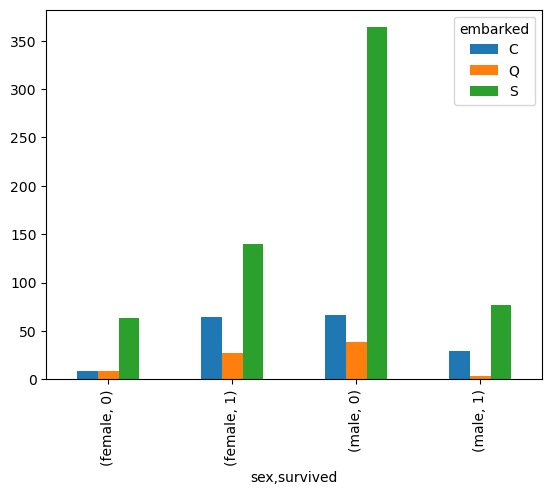

In [9]:
a=df.groupby(['sex','survived','embarked']).size().unstack()
a.plot(kind='bar')

#### 1.identify the outliers using scatter plot or box plot

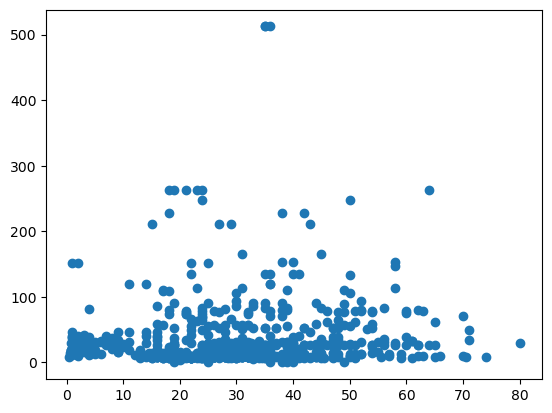

In [2]:
plt.scatter(df['age'],df['fare'])

<Axes: >

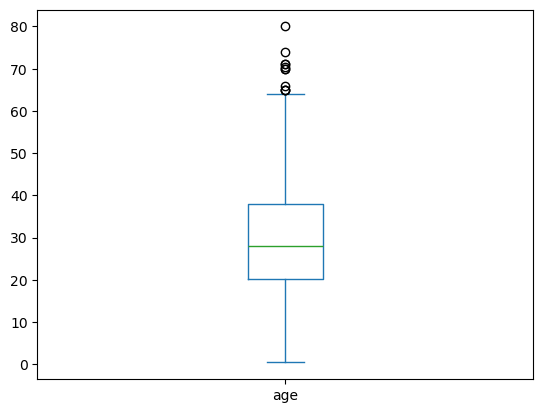

In [4]:
df['age'].plot(kind='box')

#### 2.remove the outliers using mean median values

<Axes: >

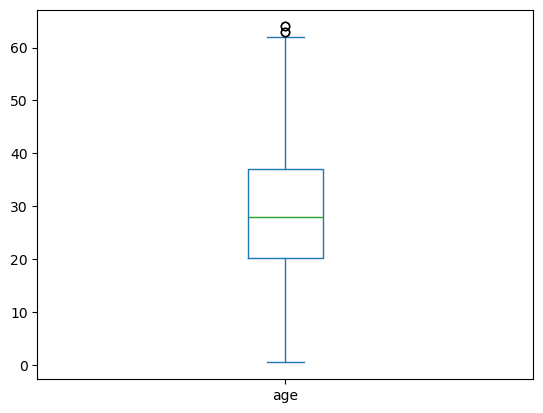

In [5]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
# Outlier condition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliers = (df['age'] < lower_bound) | (df['age'] > upper_bound)
# Replace outliers with mean
mean=df['age'].mean()
df.loc[outliers, 'age']=mean
df['age'].plot(kind='box')

<Axes: >

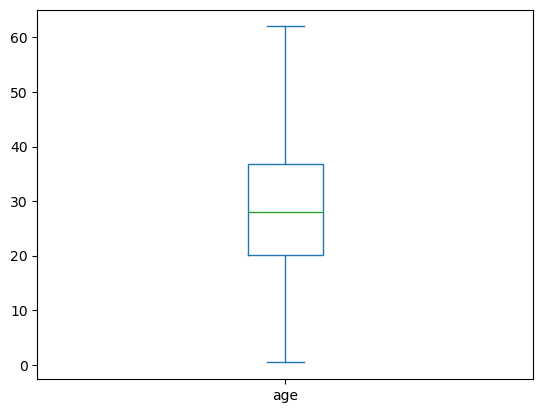

In [6]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
# Outlier condition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliers = (df['age'] < lower_bound) | (df['age'] > upper_bound)
# Replace outliers with mean
median=df['age'].median()
df.loc[outliers, 'age']=median
df['age'].plot(kind='box')

#### 3.remove the outliers using upper_bound and lower_bound

<Axes: >

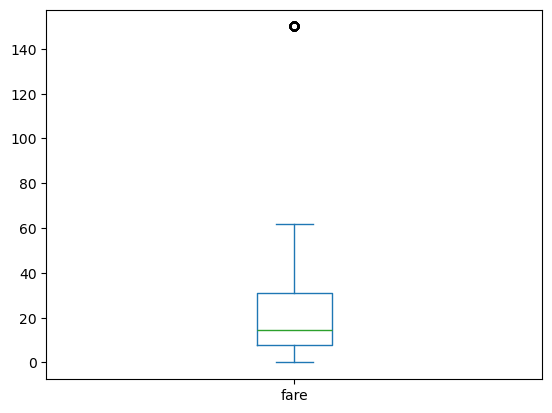

In [7]:
fare_arr=df['fare']
lowercap=0
uppercap=150
for i in df['fare']:
    if i < lower_bound:
        df['fare']=df['fare'].replace(i,lowercap)
    elif i > upper_bound:
        df['fare']=df['fare'].replace(i,uppercap)
df['fare'].plot(kind='box')

#### 4.remove the outliers using uppercap and lowercap

<Axes: >

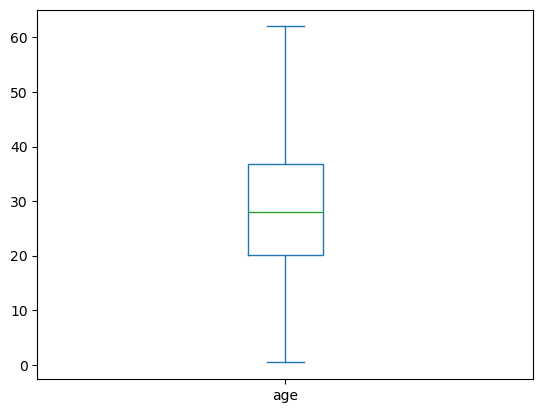

In [8]:
age_arr=df['age']
lowercap=0
uppercap=150
for i in df['age']:
    if i < lower_bound:
        df['age']=df['age'].replace(i,lowercap)
    elif i > upper_bound:
        df['age']=df['age'].replace(i,uppercap)
df['age'].plot(kind='box')

#### 5.remove the data object with outliers 

<Axes: >

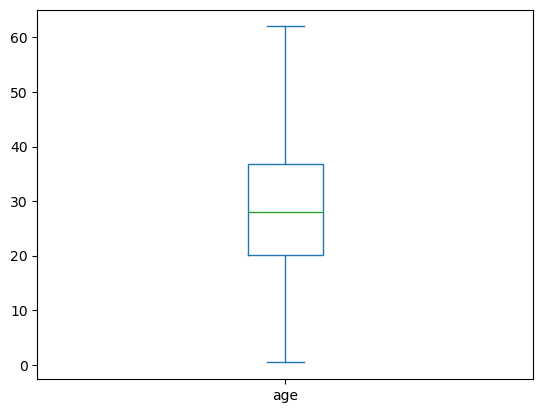

In [9]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
# Outlier condition
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_outer=df[(df['age']>=lower_bound) & (df['age']<=upper_bound)]
df_outer['age'].plot(kind='box')